In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


In [2]:
#df =pd.DataFrame(pd.read_csv('Data_for_Regression_vers03.csv',low_memory=False, header=0))

#df = pd.read_csv('FINAL_clean_sales_dataset.csv', low_memory=False)
df = pd.read_csv('../groupGithubversion/src/Data_for_Regression.csv', low_memory=False)

#df = pd.read_csv('Data_for_Regression_vers03csv', low_memory=False, header=0)

In [3]:
df.head()

,prosperity_index,house_is,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,...,property_subtype_GROUND_FLOOR,property_subtype_HOUSE,property_subtype_MIXED_USE_BUILDING,property_subtype_OTHER,property_subtype_PENTHOUSE,property_subtype_VILLA,region_F,region_W,building_state_agg_renovated,building_state_agg_to_renovate
0,95.0,1,295000.0,3.0,242.0,1,0,0,1,36.0,...,0,0,1,0,0,0,0,1,0,0
1,95.0,1,229000.0,4.0,312.0,1,0,0,1,20.0,...,0,0,1,0,0,0,0,1,0,1
2,95.0,1,150000.0,6.0,450.0,0,0,0,1,29.0,...,0,0,0,0,0,0,0,1,0,1
3,95.0,1,195000.0,3.0,242.0,1,0,0,1,36.0,...,0,1,0,0,0,0,0,1,0,0
4,95.0,1,419000.0,6.0,192.0,1,0,0,1,50.0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
df.shape

(11026, 26)

In [5]:


#df.to_csv("Data_for_Regression.csv", index=False)



In [6]:
print(df['price']) # bij read_csv met header=0, dan kan deze print niet gebeuren, geeft fout

0        295000.0
1        229000.0
2        150000.0
3        195000.0
4        419000.0
           ...   
11021    225000.0
11022    295000.0
11023    175000.0
11024    329000.0
11025    130000.0
Name: price, Length: 11026, dtype: float64


## dropping columns

In [7]:
#df = df.drop(['source', 'building_state_agg', 'region', 'facades_number'], axis=1)
df = df.drop(['house_is', 'open_fire', 'terrace', 'terrace_area', 'garden_area', 'land_surface', 'property_subtype_OTHER', 'building_state_agg_renovated', 'building_state_agg_to_renovate'], axis=1)

# Selecting targets (y's) and selecting features

In [8]:
df.columns

Index(['prosperity_index', 'price', 'rooms_number', 'area',
       'equipped_kitchen_has', 'furnished', 'garden', 'swimming_pool_has',
       'property_subtype_APARTMENT_BLOCK', 'property_subtype_DUPLEX',
       'property_subtype_GROUND_FLOOR', 'property_subtype_HOUSE',
       'property_subtype_MIXED_USE_BUILDING', 'property_subtype_PENTHOUSE',
       'property_subtype_VILLA', 'region_F', 'region_W'],
      dtype='object')

In [9]:
df1 = df

In [10]:
y = df['price']

In [11]:
ynew = y

In [12]:
X = df.drop('price', axis=1)


In [13]:
#X = df[['rooms_number', 'area', 'postcode', 'APARTMENT', 'BUNGALOW',
#'CHALET', 'HOUSE', 'KOT', 'LOFT', 'TOWN_HOUSE', 'VILLA']]

## create the regressor and scaler

### (1) split of data into train, test alternatives  
### (2) Pipeline definition 
### (3) fitting data to the pipeline
### (4) calculating the score of the model 

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
degree = 4

pipe = Pipeline([('engineering', PolynomialFeatures(degree)),
                 ('scaler', StandardScaler()),
# in case no PolynomialFeatures
#pipe = Pipeline([('scaler', StandardScaler()), 
                 ('regressor', LinearRegression())])
pipe.fit(X_train, y_train)

print('coefficient of determination - training: '+
      f'{pipe.score(X_train, y_train):.2f}'+'\n'+
      'coefficient of determination - test: '+
      f'{pipe.score(X_test, y_test):.2f}'+'\n')

coefficient of determination - training: 0.40
coefficient of determination - test: 0.39



In [15]:
df.columns

Index(['prosperity_index', 'price', 'rooms_number', 'area',
       'equipped_kitchen_has', 'furnished', 'garden', 'swimming_pool_has',
       'property_subtype_APARTMENT_BLOCK', 'property_subtype_DUPLEX',
       'property_subtype_GROUND_FLOOR', 'property_subtype_HOUSE',
       'property_subtype_MIXED_USE_BUILDING', 'property_subtype_PENTHOUSE',
       'property_subtype_VILLA', 'region_F', 'region_W'],
      dtype='object')

In [16]:
#pipe.predict(y_test)

In [17]:
X_test.columns

Index(['prosperity_index', 'rooms_number', 'area', 'equipped_kitchen_has',
       'furnished', 'garden', 'swimming_pool_has',
       'property_subtype_APARTMENT_BLOCK', 'property_subtype_DUPLEX',
       'property_subtype_GROUND_FLOOR', 'property_subtype_HOUSE',
       'property_subtype_MIXED_USE_BUILDING', 'property_subtype_PENTHOUSE',
       'property_subtype_VILLA', 'region_F', 'region_W'],
      dtype='object')

## Regression definition

In [18]:
linregres = LinearRegression()

In [19]:
linreg = LinearRegression()

In [20]:
linreg.fit(X_test, y_test)

LinearRegression()

In [21]:
y_pred = linreg.predict(X_test)

In [22]:
y_pred

array([ 193644.40811902,  340343.17649853, 1036169.12500176, ...,
        506405.13576955,  293601.09700153,  434925.60737639])

In [23]:
linreg.intercept_

-278045.5602557661

In [24]:
linreg.score(X_test, y_test)

0.608885294412388

## plot presentation

In [65]:
#df.plot(x='area', y='price')

In [26]:
kolommen = ['price', 'rooms_number', 'area']

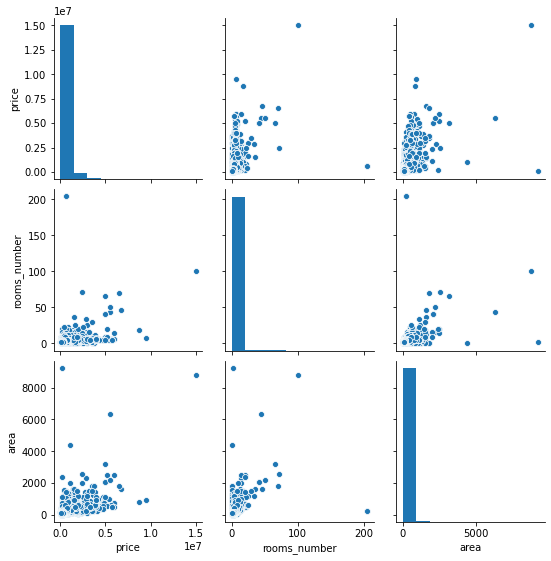

In [27]:
sns.pairplot(df[kolommen])

In [30]:
kolommen = ['prosperity_index', 'price', 'rooms_number', 'area',
       'equipped_kitchen_has', 'furnished']

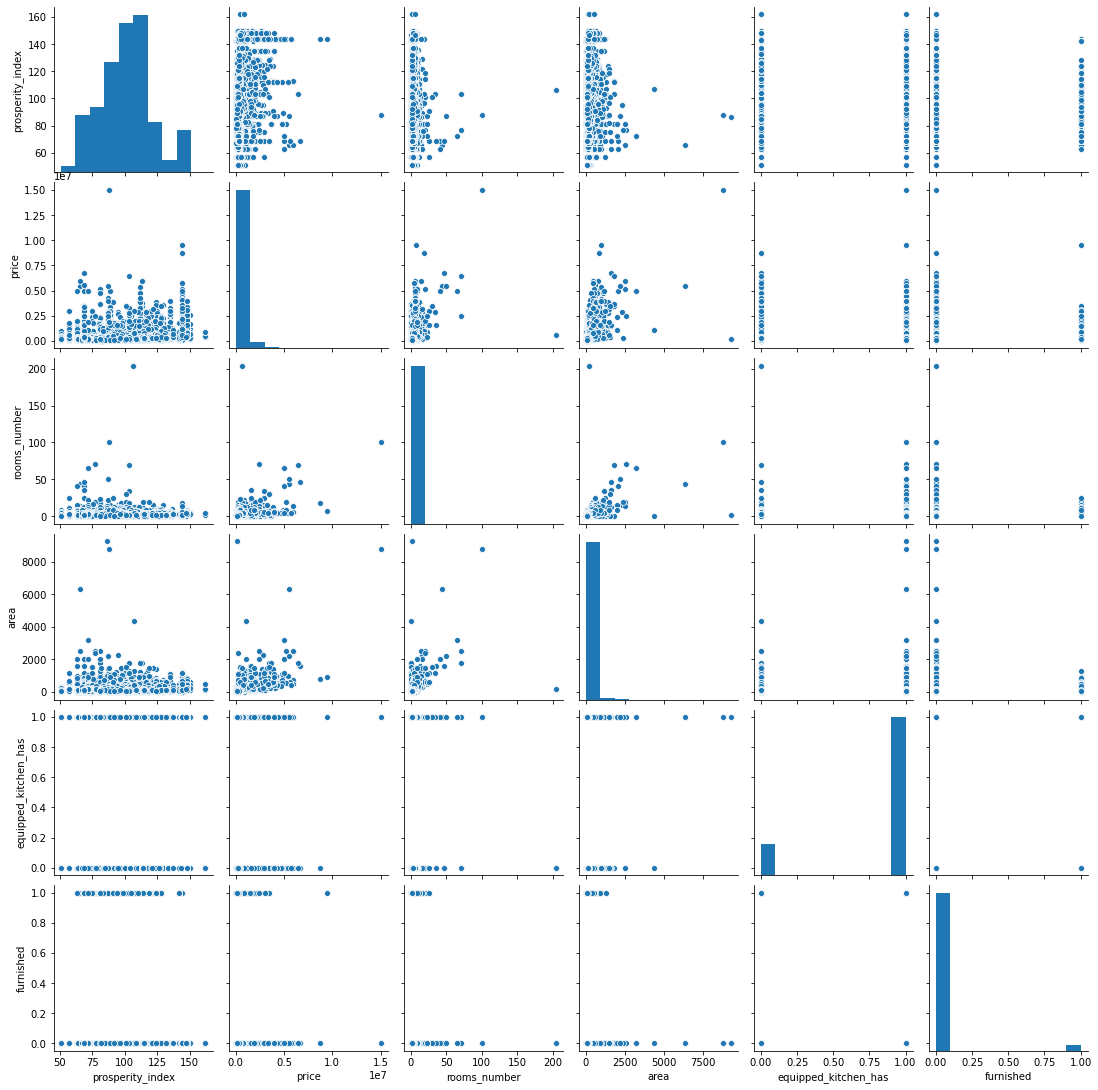

In [31]:
sns.pairplot(df[kolommen])

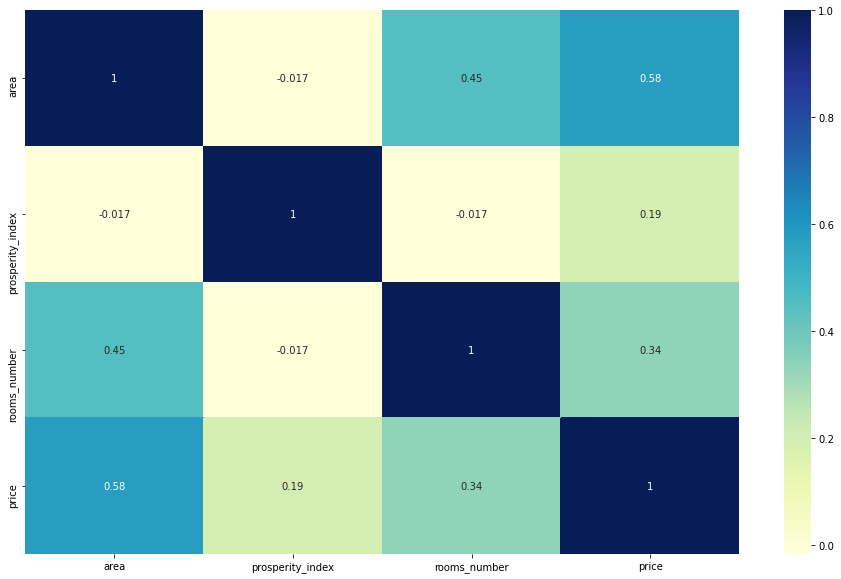

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated
columns_correlation = df[['area', 'prosperity_index', 'rooms_number', 'price']]

plt.figure(figsize = (16, 10))
sns.heatmap(columns_correlation.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Remove outliers

In [36]:
X_train['area'].max()

9250.0

In [37]:
X_train_area = X_train.sort_values(by=['area'], inplace=False, ascending=False)

In [38]:
#print(X_train_area.head(20))

In [39]:
data_top = X_train_area.head(40)  
    
lijstje = list(data_top.index.values.tolist()) 

In [40]:
print(lijstje)

[10898, 7383, 574, 9473, 7197, 4770, 223, 599, 4774, 1326, 1473, 2112, 3116, 6007, 1332, 998, 7824, 8684, 10933, 7580, 8676, 9163, 8247, 4070, 8046, 7991, 8497, 3115, 214, 2935, 458, 828, 9003, 10356, 3581, 1007, 7823, 10797, 4464, 9787]


In [41]:
X_train_area = X_train_area.drop(lijstje, axis = 0).reset_index(drop = True)

In [42]:
y_train_area = y_train.drop(lijstje, axis = 0).reset_index(drop = True)

In [43]:
X_train_area['area'].max()

1124.0

In [44]:
print(X_train_area.head(20))

    prosperity_index  rooms_number    area  equipped_kitchen_has  furnished  \
0              116.0           8.0  1124.0                     1          0   
1               87.0          22.0  1120.0                     1          0   
2               87.0           7.0  1090.0                     1          0   
3               81.0           5.0  1070.0                     1          0   
4               98.0           7.0  1040.0                     1          0   
5               72.0           0.0  1023.0                     1          0   
6               89.0           0.0  1019.0                     0          0   
7               89.0           8.0  1000.0                     1          0   
8              119.0           4.0  1000.0                     0          0   
9               86.0           2.0  1000.0                     1          0   
10             135.0           6.0  1000.0                     0          0   
11              86.0          14.0  1000.0          

## Plot with 20 highest outlieners removed

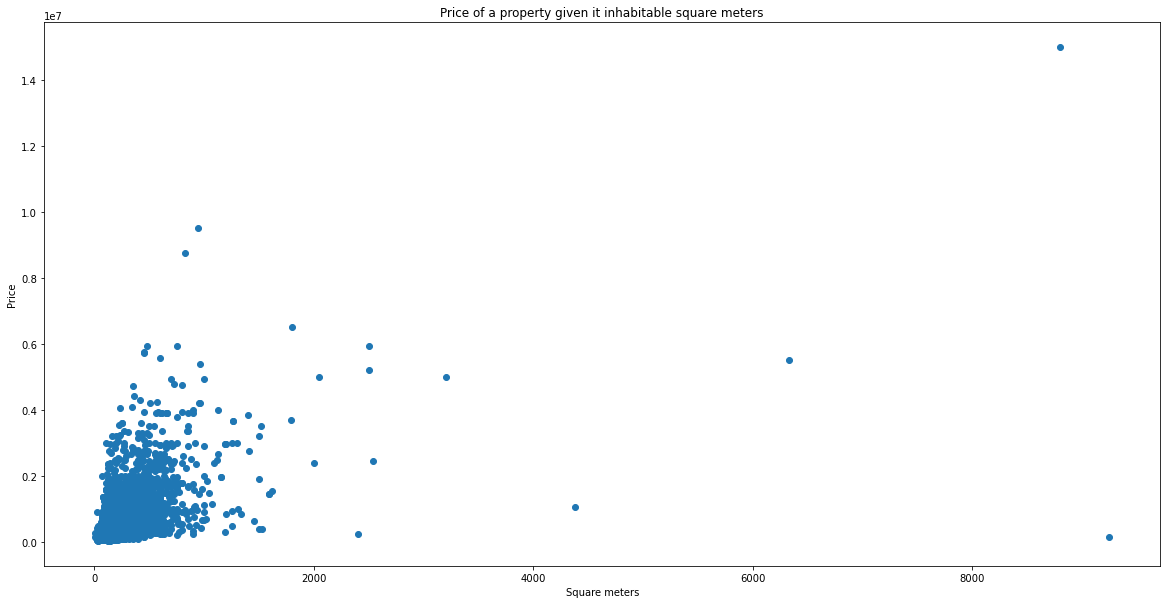

In [45]:
plt.figure(figsize=(20,10))
plt.scatter(X_train['area'], y_train)


# Add the xlabel, ylabel, and title
plt.xlabel('Square meters')
plt.ylabel('Price')
plt.title('Price of a property given it inhabitable square meters')

# Display the plot
plt.show()

## Plot with prediction line for Linear Regression

In [46]:
#X_train_area = X_train_area['area'].reshape(-1,1)
#y_train_area = y_train_area.values.reshape(-1,1)

In [47]:
# first make a dataframe of both arrays to become numpy ones
x = df
df1 = pd.DataFrame(x)

colSal = df1[['price']]
#y = colSal
y = colSal.to_numpy()

#IMPORTANT
colYea = df1[['area']] #<- in order to have 2 dimensional array, otherwise the fit and so on, won't work
#colYea = dfX.YearsExperience
#colYea = dfX.YearsExperience.values

X = colYea.to_numpy()
#X = colYea

0.3331447186234172


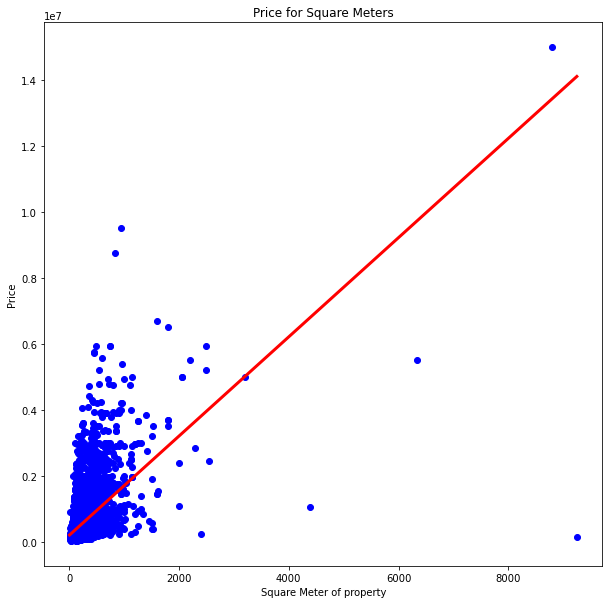

In [48]:

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
#prediction_space = np.linspace(min(X_train_area['area']), max(X_train_area['area']))

# Fit the model to the data
linregres.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_predict = linregres.predict(prediction_space)

# Print R^2 
print(linregres.score(X, y))


plt.figure(figsize=(10,10))

# Plot regression line
#plt.plot(prediction_space, y_pred, color='blue', linewidth=3)
plt.plot(prediction_space, y_predict, color='red', linewidth=3)

# scatter 
plt.scatter(X, y, color='blue')
# Add the xlabel, ylabel, and title
plt.xlabel('Square Meter of property')
plt.ylabel('Price')
plt.title('Price for Square Meters')

plt.show()


In [ ]:
print(y_pred)

In [ ]:
print(y_pred.shape)

In [ ]:
print(y_train)

In [ ]:
print(y_train.shape)

In [ ]:
print(X_train['area'])